In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [35]:
og_data = pd.read_csv('flight_delays_train.csv')
data = og_data

In [36]:
data.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
5,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
6,c-1,c-27,c-4,754,DL,PBI,LGA,1035,N
7,c-4,c-29,c-6,635,OH,MSP,CVG,596,N
8,c-7,c-28,c-5,735,AA,ONT,DFW,1189,N
9,c-6,c-20,c-2,2029,OO,DEN,PSC,853,N


Month, DayofMonth, DayOfWeek, 
DepTime – departure tim, e
UniqueCarrier – code of a company-care, er
Origin – flight ori, gin
Dest – flight destina, tion
Distance, distance between Origin and Dest air, ports
dep_delayed_15min – targettarget

In [37]:
data.describe()

,DepTime,Distance
count,100000.000000,100000.00000
mean,1341.523880,729.39716
std,476.378445,574.61686
min,1.000000,30.00000
25%,931.000000,317.00000
50%,1330.000000,575.00000
75%,1733.000000,957.00000
max,2534.000000,4962.00000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


In [39]:
data.describe(include = 'object')

,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,dep_delayed_15min
count,100000,100000,100000,100000,100000,100000,100000
unique,12,31,7,22,289,289,2
top,c-8,c-1,c-4,WN,ATL,ATL,N
freq,8830,3399,14736,15082,5834,5795,80956


In [40]:
!pip install sweetviz
import sweetviz as sv
auto_report = sv.analyze(data, target_feat = 'dep_delayed_15min')
auto_report.show_html('Flight Delay EDA')

                                             |                                             | [  0%]   00:00 ->…

Report Flight Delay EDA was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



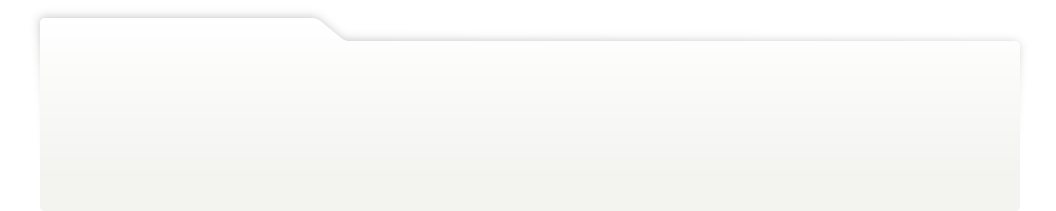
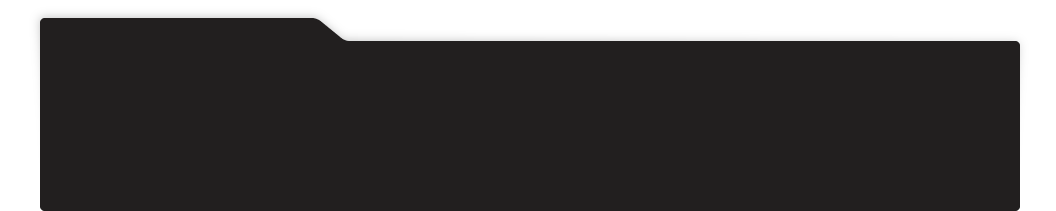
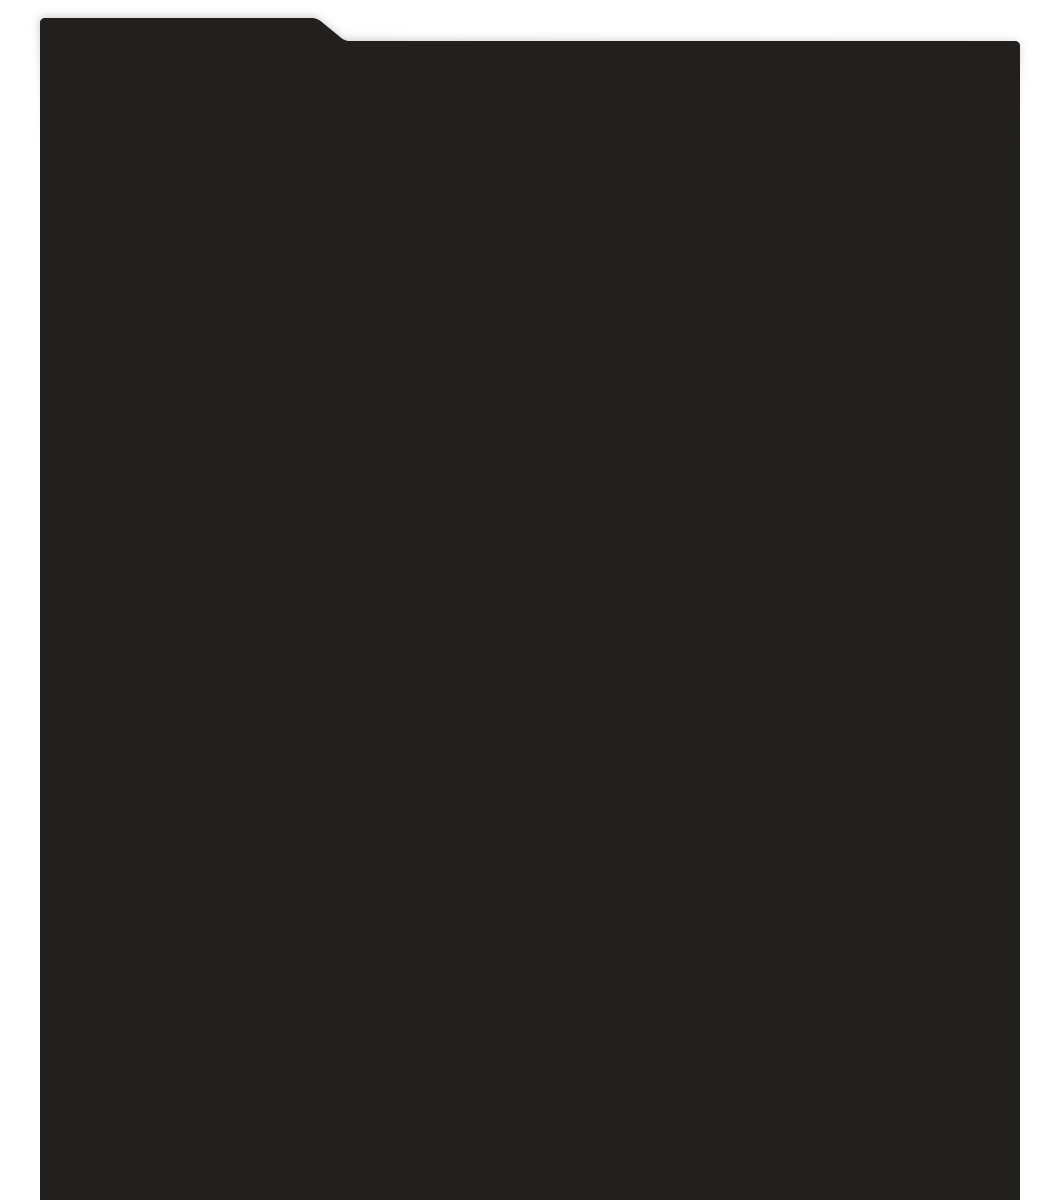
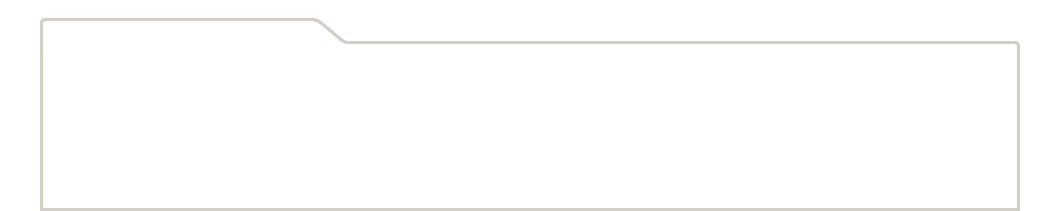
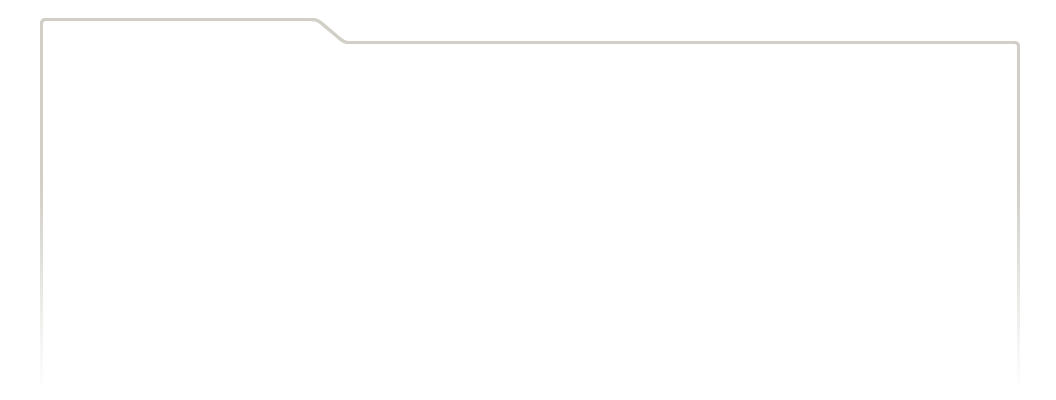
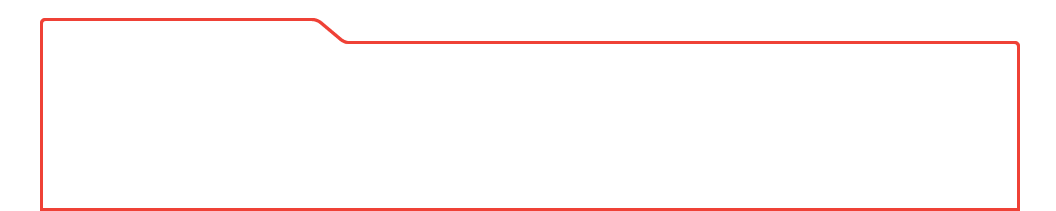
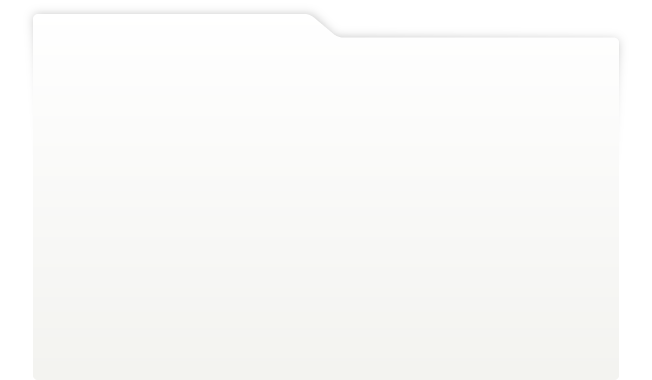
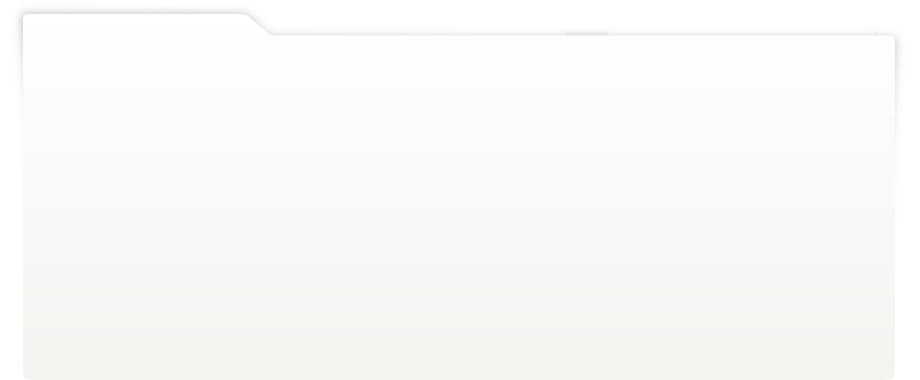
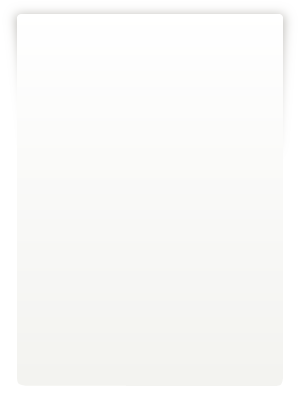
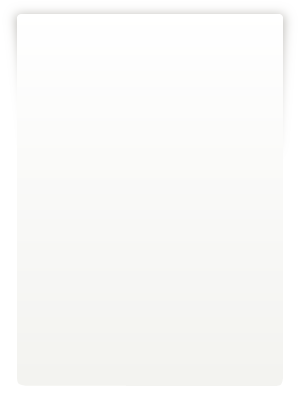
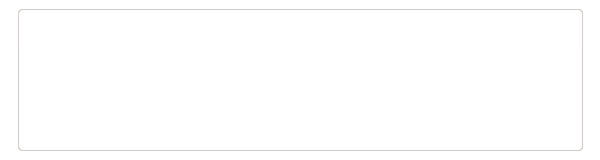
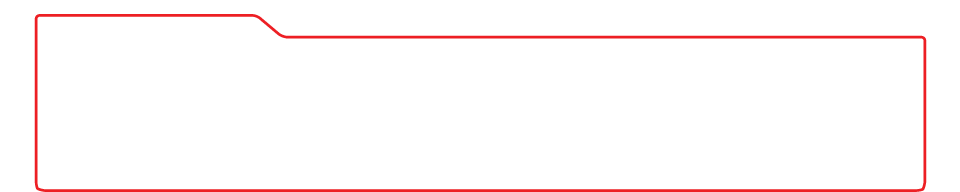
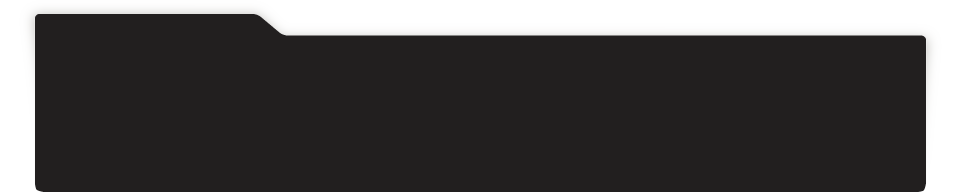
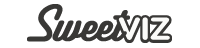
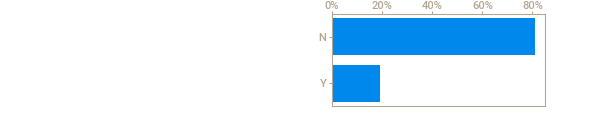
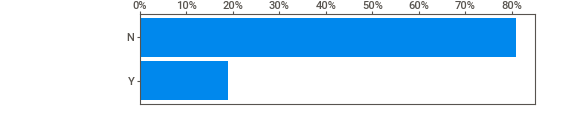
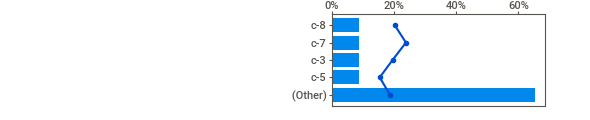
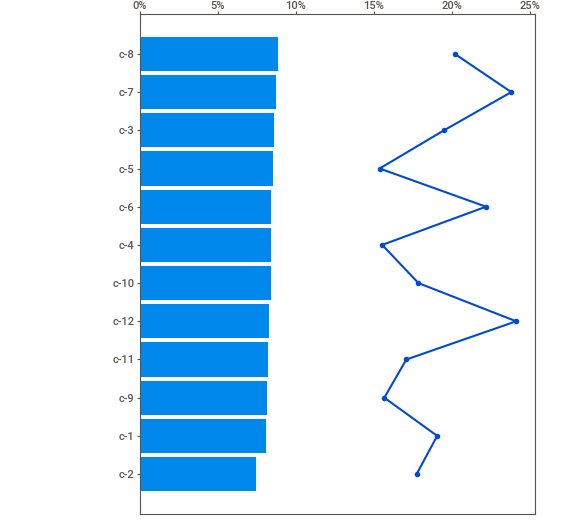
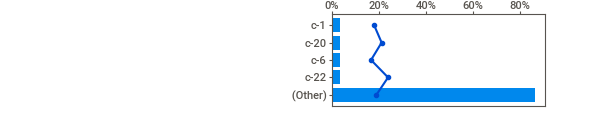
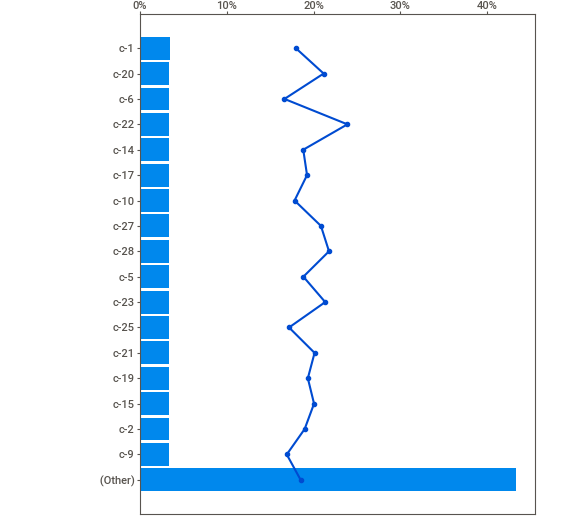
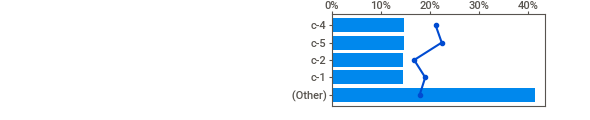
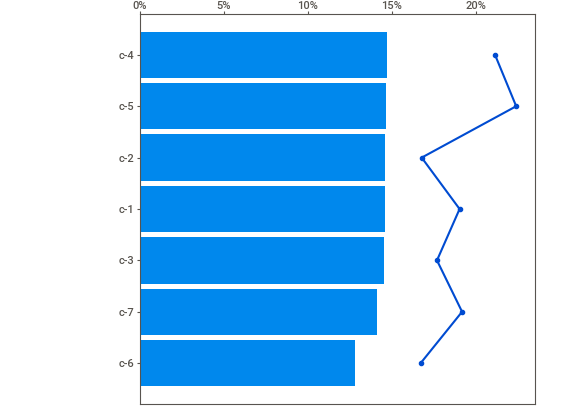
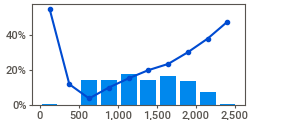
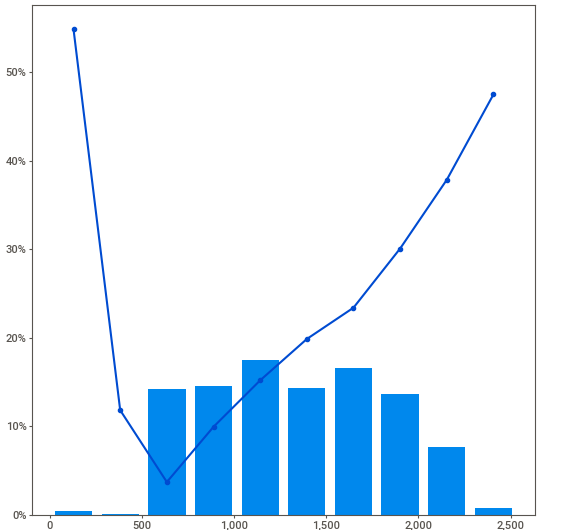
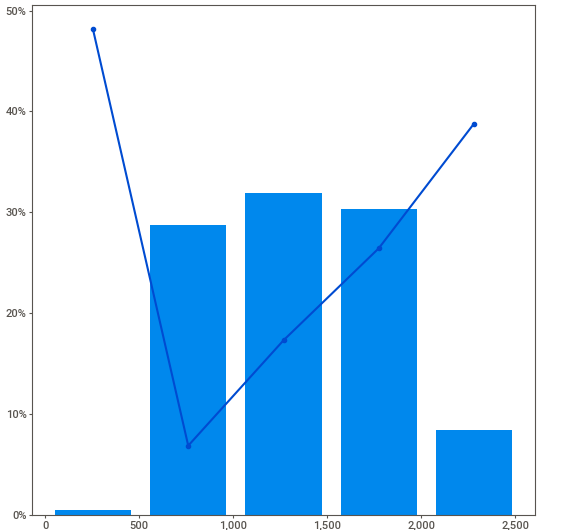
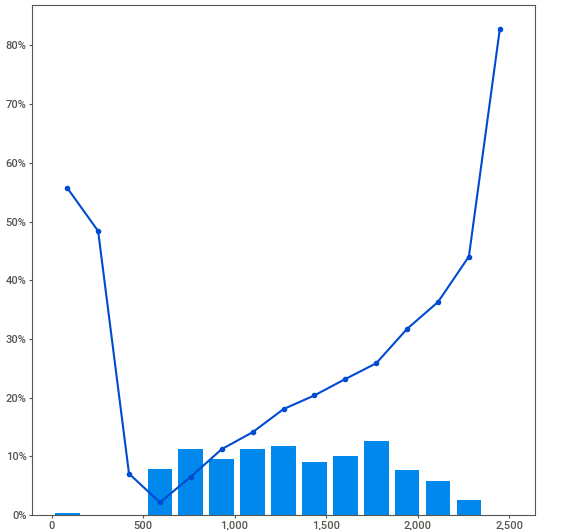
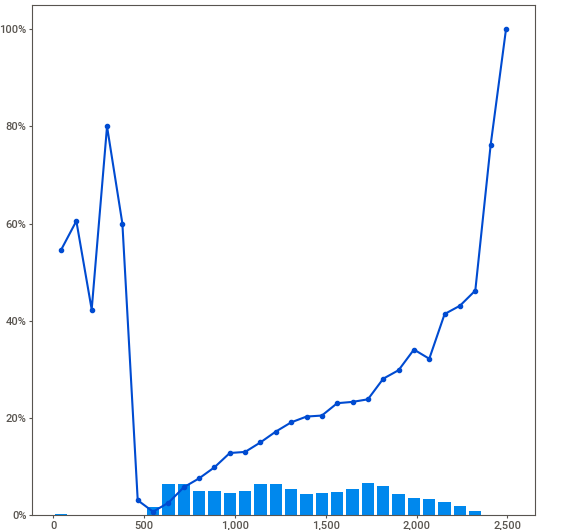
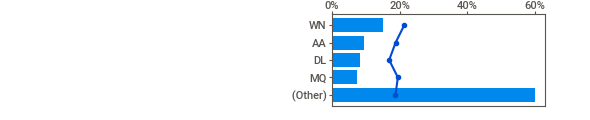
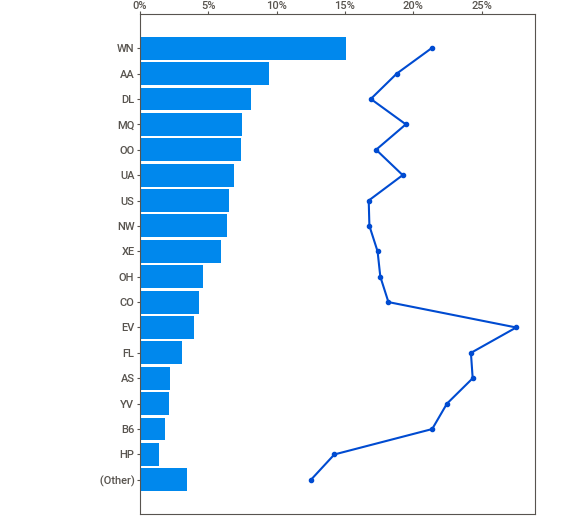
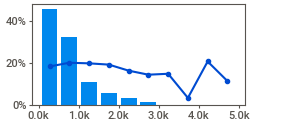
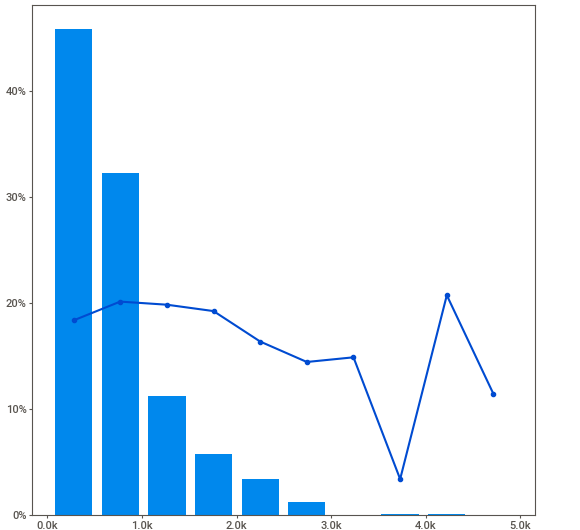
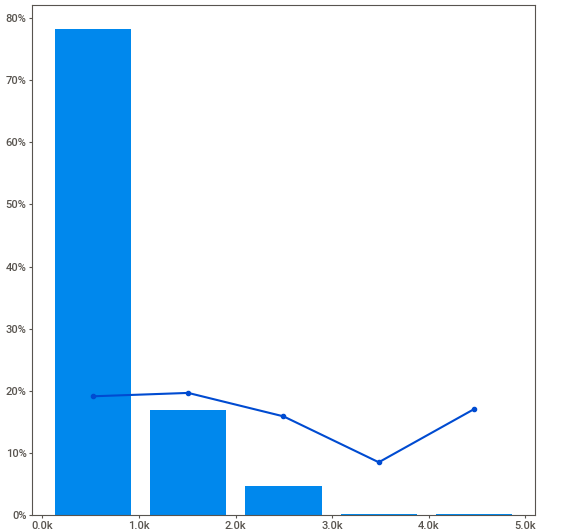
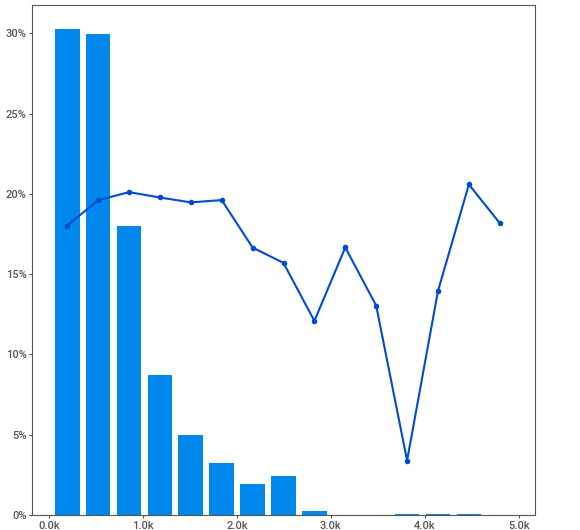
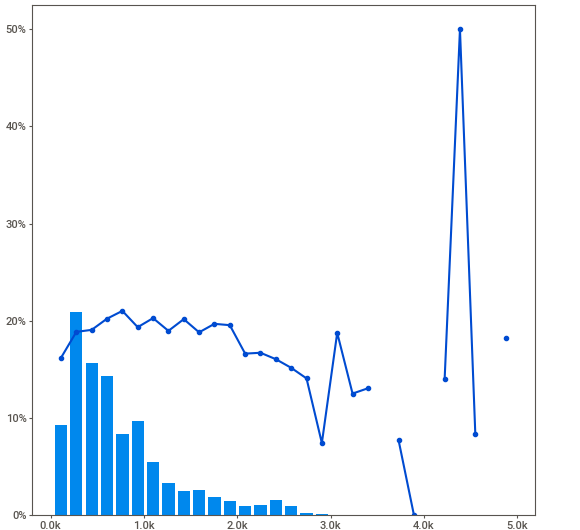
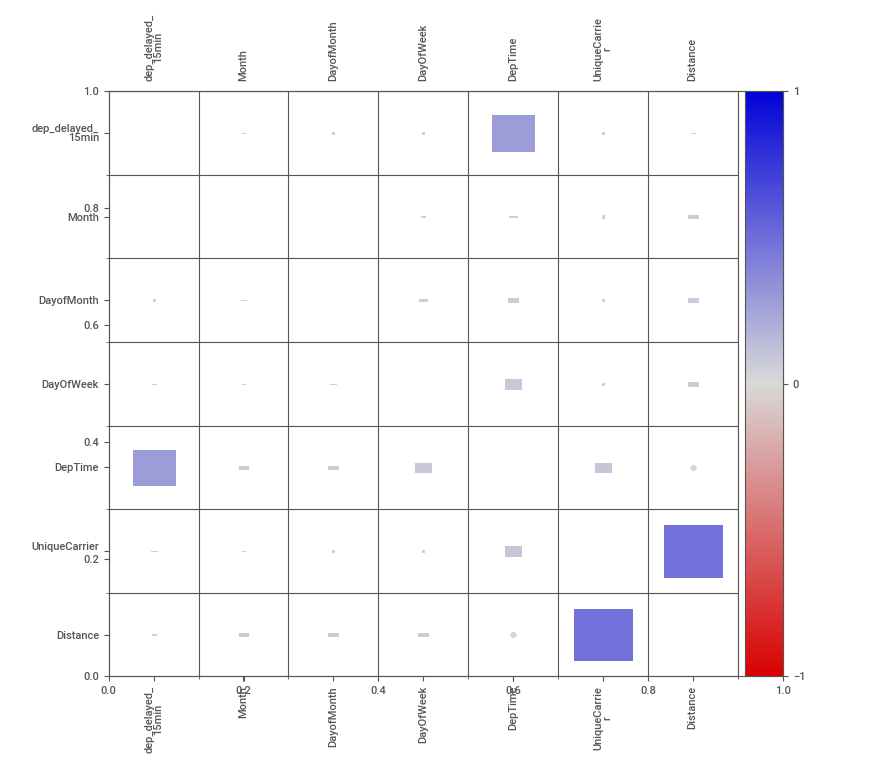
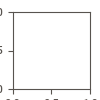

In [41]:
auto_report.show_notebook("Flight Delay EDA")

In [42]:
#Now let's do some manual EDA

data.isna().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
UniqueCarrier        0
Origin               0
Dest                 0
Distance             0
dep_delayed_15min    0
dtype: int64

In [43]:
print(data['UniqueCarrier'].value_counts())

UniqueCarrier
WN    15082
AA     9418
DL     8128
MQ     7443
OO     7390
UA     6876
US     6482
NW     6403
XE     5901
OH     4594
CO     4334
EV     3930
FL     3039
AS     2222
YV     2128
B6     1838
HP     1378
F9     1006
DH      966
HA      762
TZ      446
AQ      234
Name: count, dtype: int64


In [44]:
print(data['dep_delayed_15min'].value_counts())

dep_delayed_15min
N    80956
Y    19044
Name: count, dtype: int64


C:\PROJECTS\sample_projects\project1\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


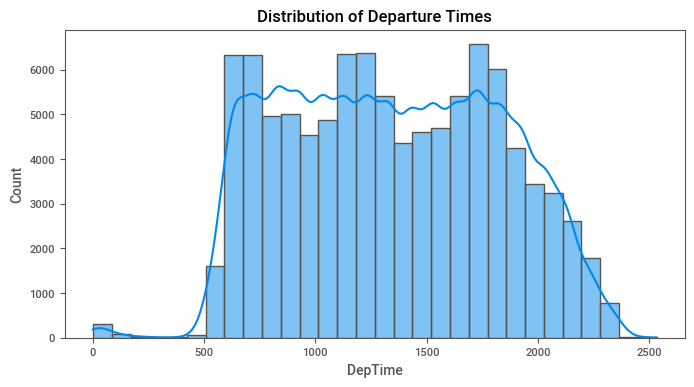

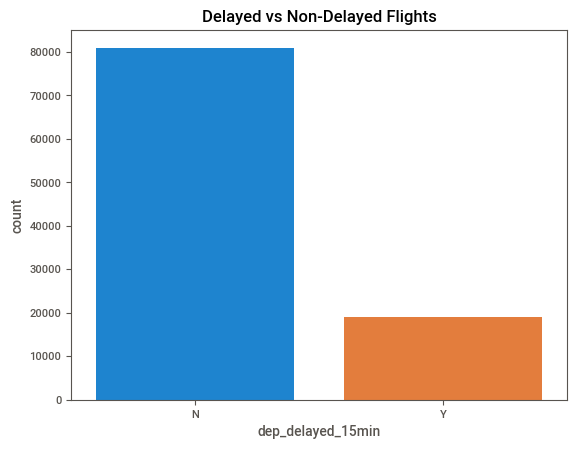

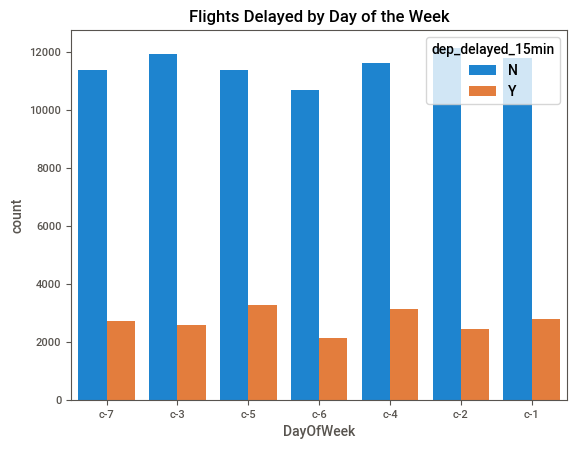

In [45]:
# Plotting distribution of DepTime
plt.figure(figsize=(8, 4))
sns.histplot(data['DepTime'], kde=True, bins=30)
plt.title('Distribution of Departure Times')
plt.show()

# Count plot of delayed flights
sns.countplot(x='dep_delayed_15min', data=data)
plt.title('Delayed vs Non-Delayed Flights')
plt.show()

# Count plot for Day of the Week
sns.countplot(x='DayOfWeek', data=data, hue='dep_delayed_15min')
plt.title('Flights Delayed by Day of the Week')
plt.show()


In [46]:
# Converting 'dep_delayed_15min' to binary (Y -> 1, N -> 0)
data['dep_delayed_15min'] = data['dep_delayed_15min'].map({'Y': 1, 'N': 0})

In [47]:
data.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'Origin', 'Dest', 'Distance', 'dep_delayed_15min'],
      dtype='object')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 6.9+ MB


                    DepTime  Distance  dep_delayed_15min
DepTime            1.000000 -0.020681           0.243819
Distance          -0.020681  1.000000          -0.002734
dep_delayed_15min  0.243819 -0.002734           1.000000


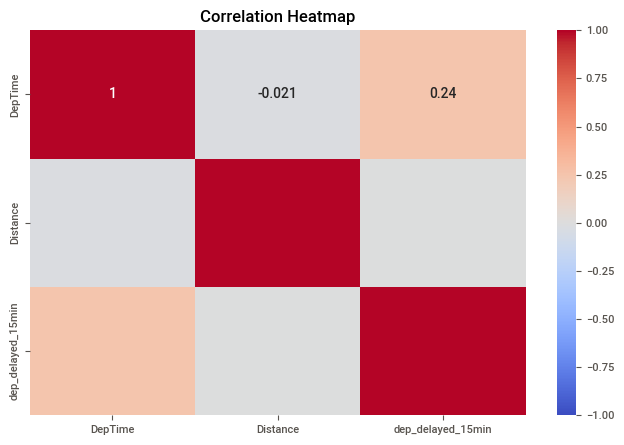

In [49]:
# Calculate correlations for specific numerical columns
corr_matrix = data[['DepTime', 'Distance', 'dep_delayed_15min']].corr()
print(corr_matrix)

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [50]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,0
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,0
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,0
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,0
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,1


In [51]:
#now, substituting values inplace of categorical elments

categ_feat_idx = np.where(data.drop('dep_delayed_15min', axis=1).dtypes == 'object')[0]
categ_feat_idx

array([0, 1, 2, 4, 5, 6], dtype=int64)

In [52]:
#making x and y for training

X_train = data.drop('dep_delayed_15min', axis=1).values
y_train = data['dep_delayed_15min'].values

In [53]:
from sklearn.model_selection import train_test_split
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, 
                                                                test_size=0.3, 
                                                                random_state=31)

In [54]:
# catboost model
!pip install catboost
from catboost import CatBoostClassifier
catb = CatBoostClassifier(random_seed=31, silent=True)

In [55]:
%%time
catb.fit(X_train_part, y_train_part, cat_features = categ_feat_idx)

CPU times: total: 1min 33s
Wall time: 2min 56s


In [56]:
# test data
t_data = pd.read_csv('flight_delays_test.csv')
t_data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


In [57]:
catb_valid_pred = catb.predict_proba(X_valid)[:, 1]

In [58]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_valid, catb_valid_pred)

0.7571740086417804

In [59]:
%%time
catb.fit(X_train, y_train,
        cat_features=categ_feat_idx)

CPU times: total: 1min 46s
Wall time: 3min 12s


In [60]:
# t_data['flight'] = t_data['Origin'] + '-->' + t_data['Dest']

In [61]:
t_data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258


In [62]:
X_test = t_data.values

In [63]:
catb_test_pred = catb.predict_proba(X_test)[:, 1]

In [65]:
# submission = pd.read_excel(r'sample_submission.xls', index_col='id')
# submission['dep_delayed_15min'] = ctb_test_pred
# submission.to_excel('sample_submission.xls')
# submission